In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import pickle

read from pickle & start at cell **"Starting to work with years"** OR import csv

In [4]:
# # # READ OBJECT FROM PICKLE  
# with open("emotions.pkl", 'rb') as picklefile: 
#     emotions = pickle.load(picklefile)

In [5]:
import pandas as pd
emotions = pd.read_csv('average_emotions.csv', index_col='Object ID')
emotions.head()

,Title,Artist Display Name,Object Date,Classification,Link Resource,Avg. Anger,Avg. Contempt,Avg. Disgust,Avg. Fear,Avg. Happiness,Avg. Neutral,Avg. Sadness,Avg. Surprise
Object ID,,,,,,,,,,,,,
10056,Hunter (from McGuire Scrapbook),William Apthorp Adams,1797–1878,Drawings,http://www.metmuseum.org/art/collection/search...,0.000,0.001,0.000,0.000,0.206,0.792,0.001,0.000
10057,The Tahitian Chief Otore (from McGuire Scrapbook),Alfred Thomas Agate,ca. 1839,Drawings,http://www.metmuseum.org/art/collection/search...,0.001,0.001,0.000,0.000,0.000,0.987,0.011,0.000
10064,James McNeill Whistler,John White Alexander,NaN,Drawings,http://www.metmuseum.org/art/collection/search...,0.002,0.001,0.001,0.000,0.001,0.836,0.159,0.000
10070,The Spanish Girl in Reverie,Washington Allston,1831,Paintings,http://www.metmuseum.org/art/collection/search...,0.000,0.000,0.000,0.000,0.001,0.998,0.000,0.000
10071,The Stoning of Saint Stephen,Washington Allston,NaN,Drawings,http://www.metmuseum.org/art/collection/search...,0.000,0.003,0.000,0.002,0.004,0.978,0.004,0.009


In [6]:
emotions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29462 entries, 10056 to 298968
Data columns (total 13 columns):
Title                  29175 non-null object
Artist Display Name    27722 non-null object
Object Date            28802 non-null object
Classification         29462 non-null object
Link Resource          29462 non-null object
Avg. Anger             29462 non-null float64
Avg. Contempt          29462 non-null float64
Avg. Disgust           29462 non-null float64
Avg. Fear              29462 non-null float64
Avg. Happiness         29462 non-null float64
Avg. Neutral           29462 non-null float64
Avg. Sadness           29462 non-null float64
Avg. Surprise          29462 non-null float64
dtypes: float64(8), object(5)
memory usage: 3.1+ MB


In [7]:
emotions['Object Date']=emotions['Object Date'].astype(str)
emotions=emotions[emotions['Object Date']!='nan']

In [8]:
emotions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28802 entries, 10056 to 298968
Data columns (total 13 columns):
Title                  28536 non-null object
Artist Display Name    27073 non-null object
Object Date            28802 non-null object
Classification         28802 non-null object
Link Resource          28802 non-null object
Avg. Anger             28802 non-null float64
Avg. Contempt          28802 non-null float64
Avg. Disgust           28802 non-null float64
Avg. Fear              28802 non-null float64
Avg. Happiness         28802 non-null float64
Avg. Neutral           28802 non-null float64
Avg. Sadness           28802 non-null float64
Avg. Surprise          28802 non-null float64
dtypes: float64(8), object(5)
memory usage: 3.1+ MB


In [9]:
len(emotions[emotions['Object Date'].str.len()==4])

14764

In [10]:
emotions.iloc[10071,:]

Title                  Johnny Sain, part of the 1949 Bowman Baseball ...
Artist Display Name                                   Bowman Gum Company
Object Date                                                         1949
Classification                                           Prints|Ephemera
Link Resource          http://www.metmuseum.org/art/collection/search...
Avg. Anger                                                         0.554
Avg. Contempt                                                      0.001
Avg. Disgust                                                       0.041
Avg. Fear                                                              0
Avg. Happiness                                                     0.003
Avg. Neutral                                                       0.133
Avg. Sadness                                                           0
Avg. Surprise                                                      0.267
Name: 417013, dtype: object

### Number of artworks

In [11]:
len(emotions)

28802

### Number of unique values in the date col; oh boy

In [12]:
emotions['Object Date'].unique()

array(['1797–1878', 'ca. 1839', '1831', ...,
       'Second half of the 18th century (segunda mitad del siglo XVIII)',
       '2008', '1854–57'], dtype=object)

In [13]:
emotions['Object Date'].nunique()

3589

### Number of works with no date information

In [14]:
len(emotions[emotions['Object Date']=='nan'])

0

### Number of items with exactly 4 digit year as the date:

In [15]:
len(emotions[emotions['Object Date'].str.len()==4])

14764

### Number of items that exact match "ca. XXXX" pattern

In [16]:
#for omg in emotions['Object Date'].unique():
#    print(omg)

In [17]:
import re
strict_circa_year = re.compile('^ca. \d{4}$')

In [18]:
emotions['Object Date'].str.match(strict_circa_year).sum()

3860

In [19]:
emotions[emotions['Object Date'].str.match(strict_circa_year)].head()

,Title,Artist Display Name,Object Date,Classification,Link Resource,Avg. Anger,Avg. Contempt,Avg. Disgust,Avg. Fear,Avg. Happiness,Avg. Neutral,Avg. Sadness,Avg. Surprise
Object ID,,,,,,,,,,,,,
10057,The Tahitian Chief Otore (from McGuire Scrapbook),Alfred Thomas Agate,ca. 1839,Drawings,http://www.metmuseum.org/art/collection/search...,0.001,0.001,0.0,0.0,0.000,0.987,0.011,0.000
10074,Maurice Levy,Ezra Ames,ca. 1820,Paintings,http://www.metmuseum.org/art/collection/search...,0.000,0.001,0.0,0.0,0.001,0.995,0.003,0.000
10075,Philip Van Cortlandt,Ezra Ames,ca. 1810,Paintings,http://www.metmuseum.org/art/collection/search...,0.000,0.001,0.0,0.0,0.012,0.987,0.000,0.000
10132,The Veronese Print,J. Carroll Beckwith,ca. 1890,Drawings,http://www.metmuseum.org/art/collection/search...,0.000,0.000,0.0,0.0,0.119,0.876,0.001,0.005
10139,Portrait of a Gentleman,Henry Benbridge,ca. 1780,Paintings,http://www.metmuseum.org/art/collection/search...,0.000,0.000,0.0,0.0,0.003,0.996,0.001,0.000


### exact maches: XXXXs

In [20]:
decade_given=re.compile('^\d{4}s$')
#emotions[emotions['Object Date'].str.match(decade_given)]
len(emotions[emotions['Object Date'].str.match(decade_given)])

1413

### XXXXs-XXs ... and XXXXs-XXXXs

In [21]:
range_decades=re.compile('^\d{4}s')
emotions[emotions['Object Date'].str.match(range_decades)].head()
#len(emotions[emotions['Object Date'].str.match(range_decades)])

,Title,Artist Display Name,Object Date,Classification,Link Resource,Avg. Anger,Avg. Contempt,Avg. Disgust,Avg. Fear,Avg. Happiness,Avg. Neutral,Avg. Sadness,Avg. Surprise
Object ID,,,,,,,,,,,,,
12109,Hercules Brabazon Brabazon,John Singer Sargent,1890s,Drawings,http://www.metmuseum.org/art/collection/search...,0.007,0.000,0.0,0.0,0.002,0.987,0.002,0.001
16166,Carey Ambler,Virginia Hendrickson Irvin,1950s,Paintings,http://www.metmuseum.org/art/collection/search...,0.000,0.000,0.0,0.0,1.000,0.000,0.000,0.000
19376,Portrait of a Boy,NaN,1840s,Paintings,http://www.metmuseum.org/art/collection/search...,0.000,0.000,0.0,0.0,0.210,0.790,0.000,0.000
259699,Alexander Jensen Low,George Platt Lynes,1930s–40s,Photographs,http://www.metmuseum.org/art/collection/search...,0.001,0.003,0.0,0.0,0.004,0.992,0.000,0.000
259701,Jared French,George Platt Lynes,1930s–40s,Photographs,http://www.metmuseum.org/art/collection/search...,0.005,0.001,0.0,0.0,0.000,0.993,0.000,0.001


# Starting to work with years  
quick and dirty assignment of year

In [22]:
emotions.head()

,Title,Artist Display Name,Object Date,Classification,Link Resource,Avg. Anger,Avg. Contempt,Avg. Disgust,Avg. Fear,Avg. Happiness,Avg. Neutral,Avg. Sadness,Avg. Surprise
Object ID,,,,,,,,,,,,,
10056,Hunter (from McGuire Scrapbook),William Apthorp Adams,1797–1878,Drawings,http://www.metmuseum.org/art/collection/search...,0.000,0.001,0.0,0.0,0.206,0.792,0.001,0.0
10057,The Tahitian Chief Otore (from McGuire Scrapbook),Alfred Thomas Agate,ca. 1839,Drawings,http://www.metmuseum.org/art/collection/search...,0.001,0.001,0.0,0.0,0.000,0.987,0.011,0.0
10070,The Spanish Girl in Reverie,Washington Allston,1831,Paintings,http://www.metmuseum.org/art/collection/search...,0.000,0.000,0.0,0.0,0.001,0.998,0.000,0.0
10074,Maurice Levy,Ezra Ames,ca. 1820,Paintings,http://www.metmuseum.org/art/collection/search...,0.000,0.001,0.0,0.0,0.001,0.995,0.003,0.0
10075,Philip Van Cortlandt,Ezra Ames,ca. 1810,Paintings,http://www.metmuseum.org/art/collection/search...,0.000,0.001,0.0,0.0,0.012,0.987,0.000,0.0


In [23]:
emotions['yearapprox']=emotions['Object Date']

In [24]:
# I used your method :) 
pattern = r'([0-9]{4})'
emotions['yearapprox']=emotions['Object Date'].str.extract(pattern)

In [25]:
# DROP NULLS
emotions=emotions[emotions['yearapprox'].notnull()]

In [26]:
len(emotions)

27092

In [27]:
# have one column of years as ints
emotions['intyears']=[int(x) for x in emotions['yearapprox']]

In [28]:
#one col of years as datetime obj
emotions['yearapprox']=[datetime.strptime(x, '%Y') for x in emotions['yearapprox']]

#### save dataframe

In [29]:
import pickle
# DUMP OBJECT INTO PICKLE
with open('emotions.pkl', 'wb') as picklefile:
    pickle.dump(emotions, picklefile)

In [30]:
mybins=[1100,1200,1300,1400,1500,1600, 1700,1800,1900,2000,2050]

In [31]:
# eh...
#r = pd.period_range('1600-01-01', '2019-01-01', freq='Y')
#r

#### Years start at 1100!! :O!!!

In [33]:
sorted(emotions['yearapprox'])[0]

datetime.datetime(1100, 1, 1, 0, 0)

In [34]:
groups=emotions.groupby(pd.cut(emotions.intyears, mybins))

In [35]:
groups.yearapprox.count()

intyears
(1100, 1200]        4
(1200, 1300]        3
(1300, 1400]       55
(1400, 1500]      331
(1500, 1600]     1115
(1600, 1700]     1382
(1700, 1800]     1745
(1800, 1900]    10534
(1900, 2000]    11868
(2000, 2050]       54
Name: yearapprox, dtype: int64

In [36]:
pd.DataFrame(groups.yearapprox.count()).plot(kind='bar', title='number of works per bin', legend=False)

In [37]:
emotions.columns #printing so I can copy & paste hehe

Index(['Title', 'Artist Display Name', 'Object Date', 'Classification',
       'Link Resource', 'Avg. Anger', 'Avg. Contempt', 'Avg. Disgust',
       'Avg. Fear', 'Avg. Happiness', 'Avg. Neutral', 'Avg. Sadness',
       'Avg. Surprise', 'yearapprox', 'intyears'],
      dtype='object')

### Here we have the avg of the avg for each BIN (note that some bins are centuries and some are only 50 years!)

In [38]:
groups['Avg. Anger',
       'Avg. Contempt', 'Avg. Disgust', 'Avg. Fear', 'Avg. Happiness',
       'Avg. Neutral', 'Avg. Sadness', 'Avg. Surprise'].mean()

,Avg. Anger,Avg. Contempt,Avg. Disgust,Avg. Fear,Avg. Happiness,Avg. Neutral,Avg. Sadness,Avg. Surprise
intyears,,,,,,,,
"(1100, 1200]",0.284250,0.000750,0.001500,0.038000,0.023750,0.553000,0.005500,0.093500
"(1200, 1300]",0.000333,0.026000,0.000000,0.000333,0.002667,0.958333,0.001667,0.011333
"(1300, 1400]",0.008164,0.008127,0.002800,0.000600,0.013691,0.894564,0.060327,0.011891
"(1400, 1500]",0.006417,0.005813,0.001369,0.001940,0.031160,0.893003,0.047296,0.012976
"(1500, 1600]",0.008587,0.006186,0.002037,0.004984,0.042902,0.867294,0.045902,0.022114
"(1600, 1700]",0.005502,0.006454,0.001081,0.002258,0.099370,0.850427,0.022542,0.012243
"(1700, 1800]",0.013007,0.006614,0.002088,0.003926,0.109647,0.811820,0.030964,0.021860
"(1800, 1900]",0.004352,0.004089,0.000377,0.001387,0.107886,0.862090,0.012017,0.007597
"(1900, 2000]",0.007322,0.007235,0.001760,0.001246,0.248970,0.711742,0.013704,0.007859


In [39]:
# for each bin, the MAX 'avg score' per emotion
groups['Avg. Anger',
       'Avg. Contempt', 'Avg. Disgust', 'Avg. Fear', 'Avg. Happiness',
       'Avg. Neutral', 'Avg. Sadness', 'Avg. Surprise'].max()

,Avg. Anger,Avg. Contempt,Avg. Disgust,Avg. Fear,Avg. Happiness,Avg. Neutral,Avg. Sadness,Avg. Surprise
intyears,,,,,,,,
"(1100, 1200]",0.742,0.001,0.004,0.087,0.064,0.992,0.008,0.308
"(1200, 1300]",0.001,0.077,0.000,0.001,0.006,0.981,0.003,0.025
"(1300, 1400]",0.196,0.130,0.054,0.019,0.190,0.996,0.479,0.246
"(1400, 1500]",0.211,0.189,0.178,0.166,1.000,1.000,0.765,0.563
"(1500, 1600]",0.976,0.335,0.214,0.406,0.985,1.000,0.935,0.959
"(1600, 1700]",0.771,0.673,0.249,0.702,1.000,1.000,0.708,0.572
"(1700, 1800]",0.943,0.652,0.240,0.435,1.000,1.000,0.949,0.984
"(1800, 1900]",0.946,0.772,0.244,0.980,1.000,1.000,0.948,0.992
"(1900, 2000]",0.987,0.870,0.557,0.914,1.000,1.000,0.998,0.997


I wonder how technique, medium, culture, etc play a part in the emotions - avg surprise is super low till 1300, then steadily increases, and is quite high from 1700 onwards.  
sort of similar trend with anger  
or perhaps just product of number of artworks?

In [40]:
max_emotes=pd.DataFrame(groups['Avg. Anger',
       'Avg. Contempt', 'Avg. Disgust', 'Avg. Fear', 'Avg. Happiness',
       'Avg. Neutral', 'Avg. Sadness', 'Avg. Surprise'].max())

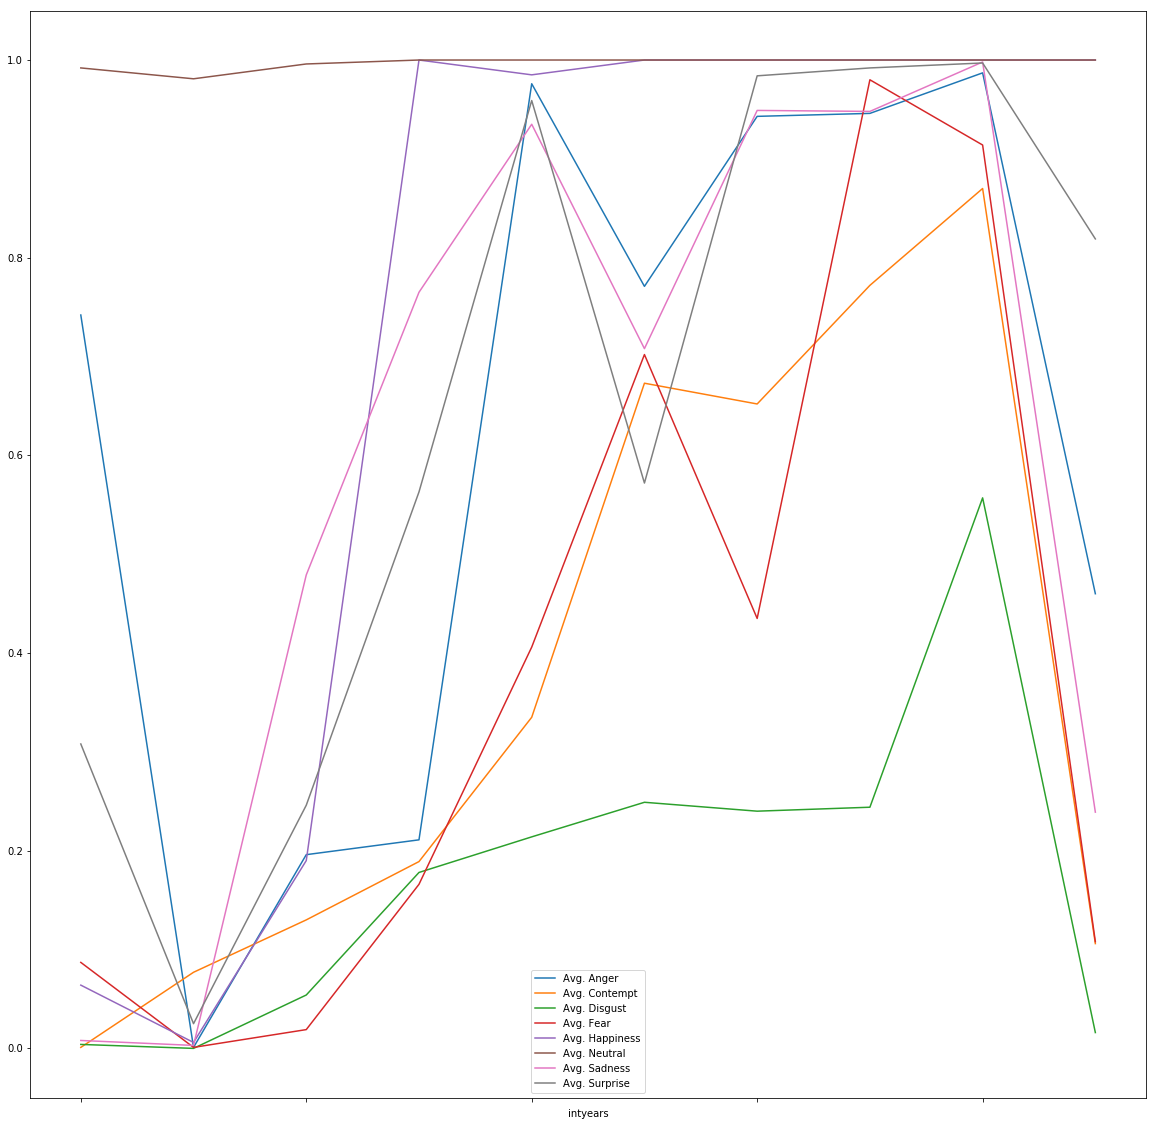

In [41]:
max_emotes.plot(figsize=(20,20)) #x axis may be off

more to come :)